# NYU Data Science Bootcamp Project

## Predicting Diabetes in Pima Indians

### Importing Libraries

In [1]:
from IPython.display import HTML

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
plt.style.use('fivethirtyeight')

### Loading the dataset

In [4]:
dataset = pd.read_csv('diabetes.csv')

dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploring the dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In our analysis of the Pima Dataset, notable observations reveal that the minimum values recorded for 'Glucose,' 'BloodPressure,' 'SkinThickness,' 'Insulin,' and 'BMI' are zero, which inherently contradicts physiological plausibility. This suggests the presence of missing or invalid entries, given that these measurements cannot realistically be zero in a human context. 

To facilitate improved predictive accuracy and model reliability, it is imperative to address these zero values by employing suitable imputation methods to ensure the dataset's integrity and the efficacy of subsequent predictive modeling.

In [7]:
# Creating a backup copy of the database
dataset_backup = dataset.copy(deep=True)

# Replacing all 0s with NaN
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Counting all the missing values
print(dataset.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In order to address these missing values, it is essential to comprehend the distribution characteristics inherent within the dataset.

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

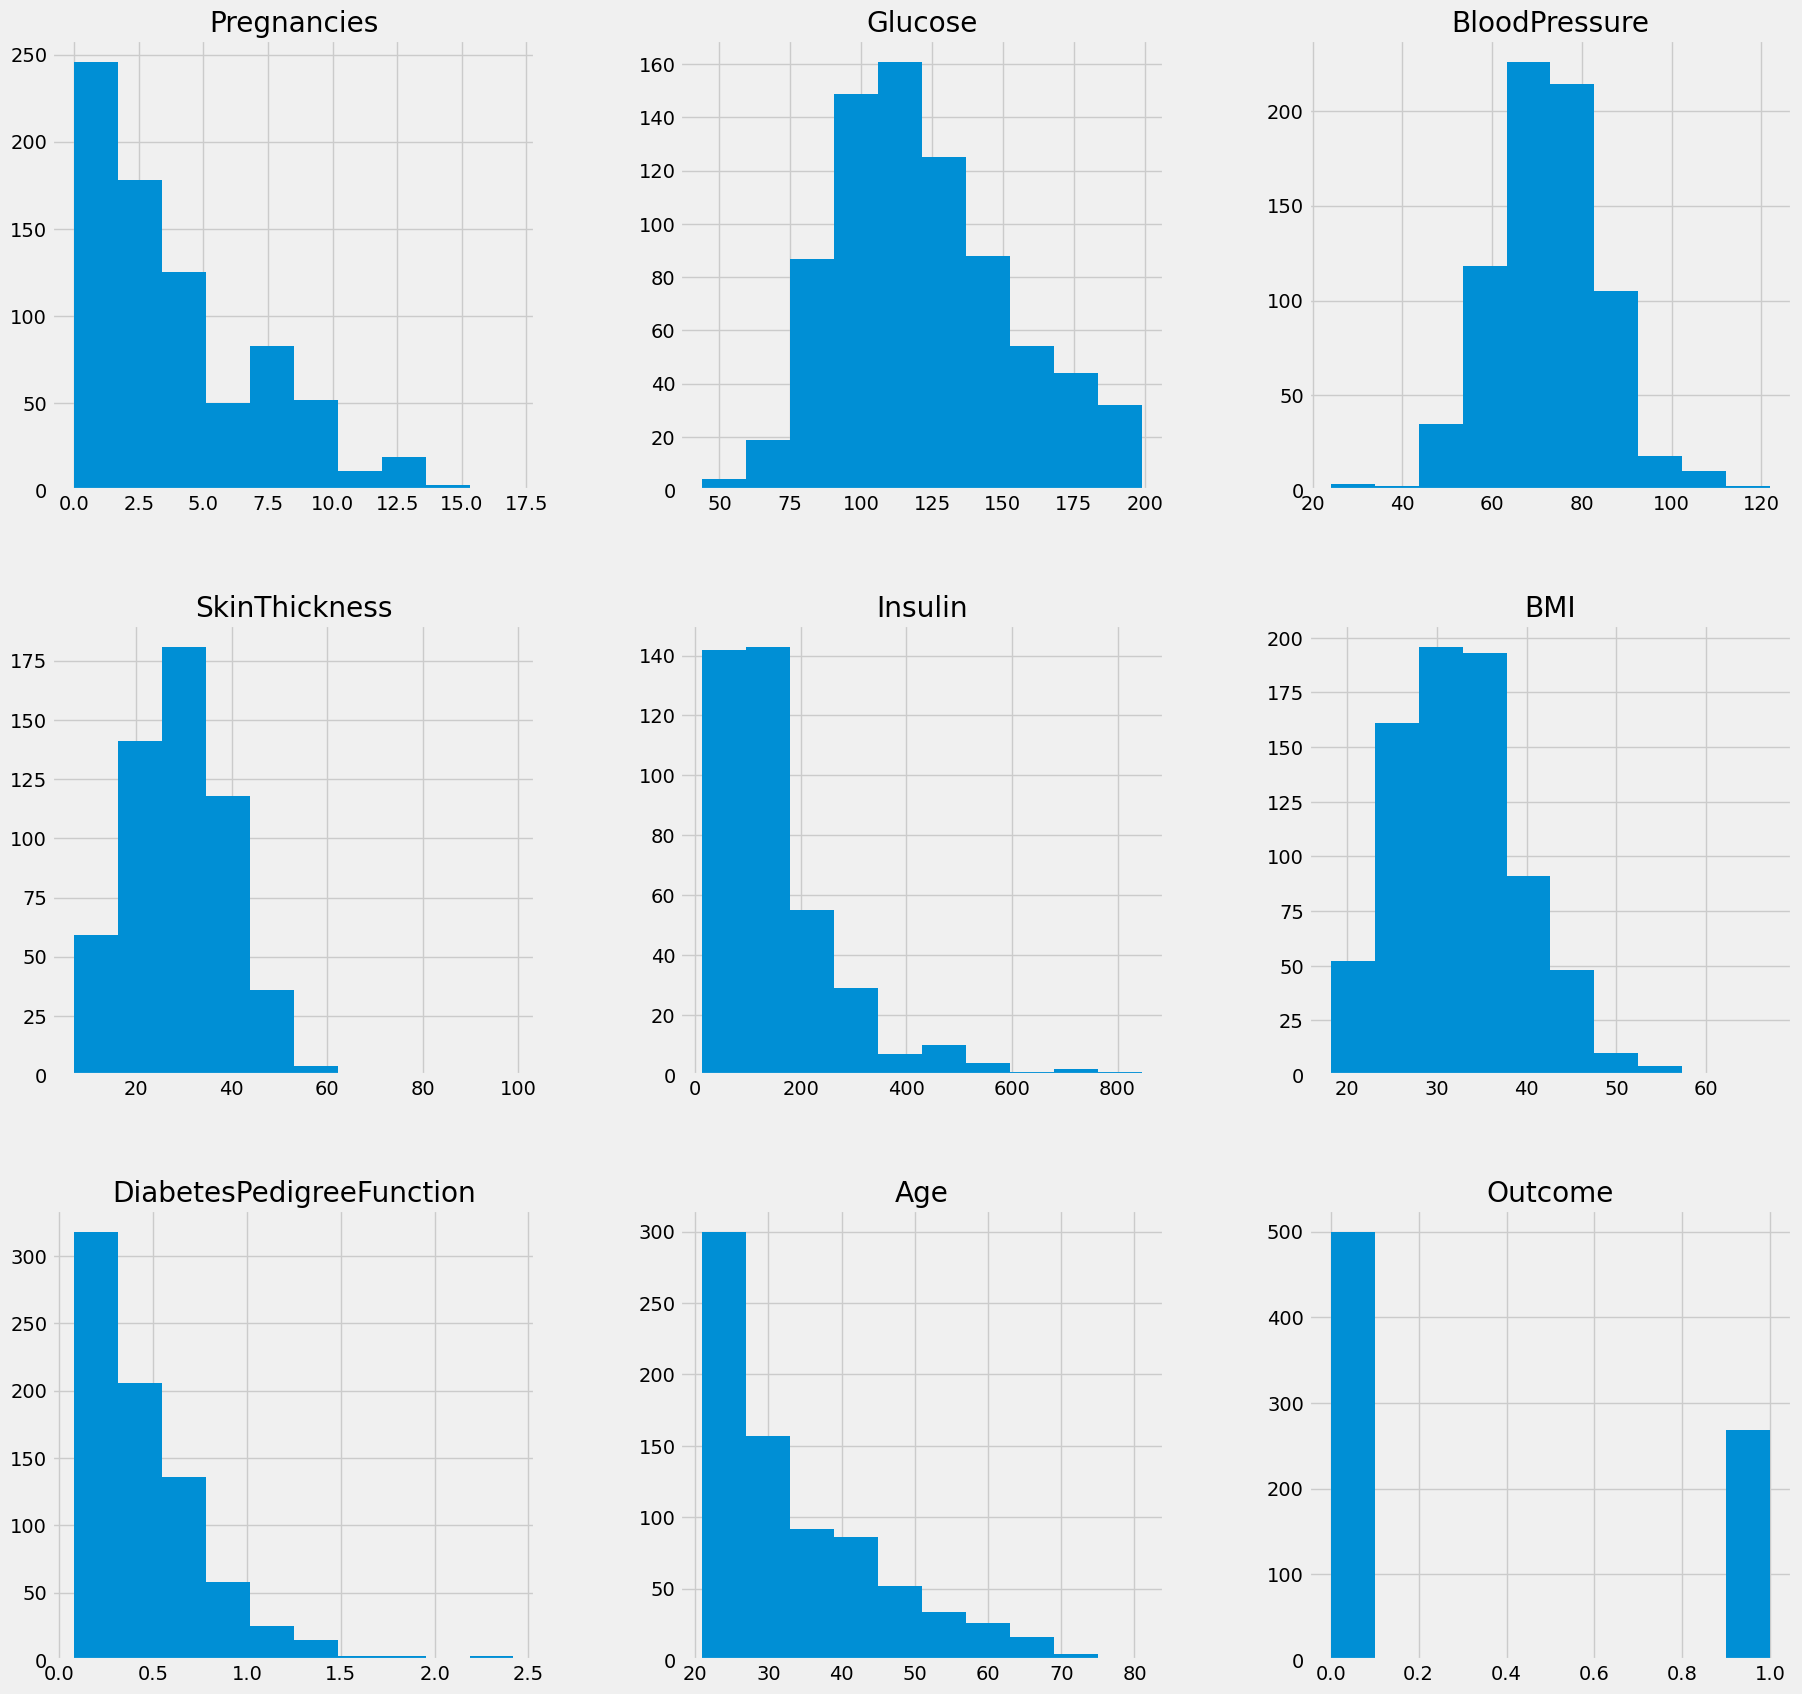

In [8]:
dataset.hist(figsize=(20,20))

We've chosen to impute missing values differently based on the distribution characteristics of the variables. For 'Glucose' and 'BloodPressure,' which exhibit a normal distribution, we've opted to replace missing values with their respective means. However, considering the right-skewed distributions observed in 'SkinThickness,' 'Insulin,' and 'BMI,' we've used the mean as the replacement value for their missing entries.

In [9]:
dataset['Glucose'].fillna(dataset['Glucose'].mean(), inplace=True)
dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean(), inplace=True)
dataset['SkinThickness'].fillna(dataset['SkinThickness'].median(), inplace=True)
dataset['Insulin'].fillna(dataset['Insulin'].median(), inplace=True)
dataset['BMI'].fillna(dataset['BMI'].median(), inplace=True)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

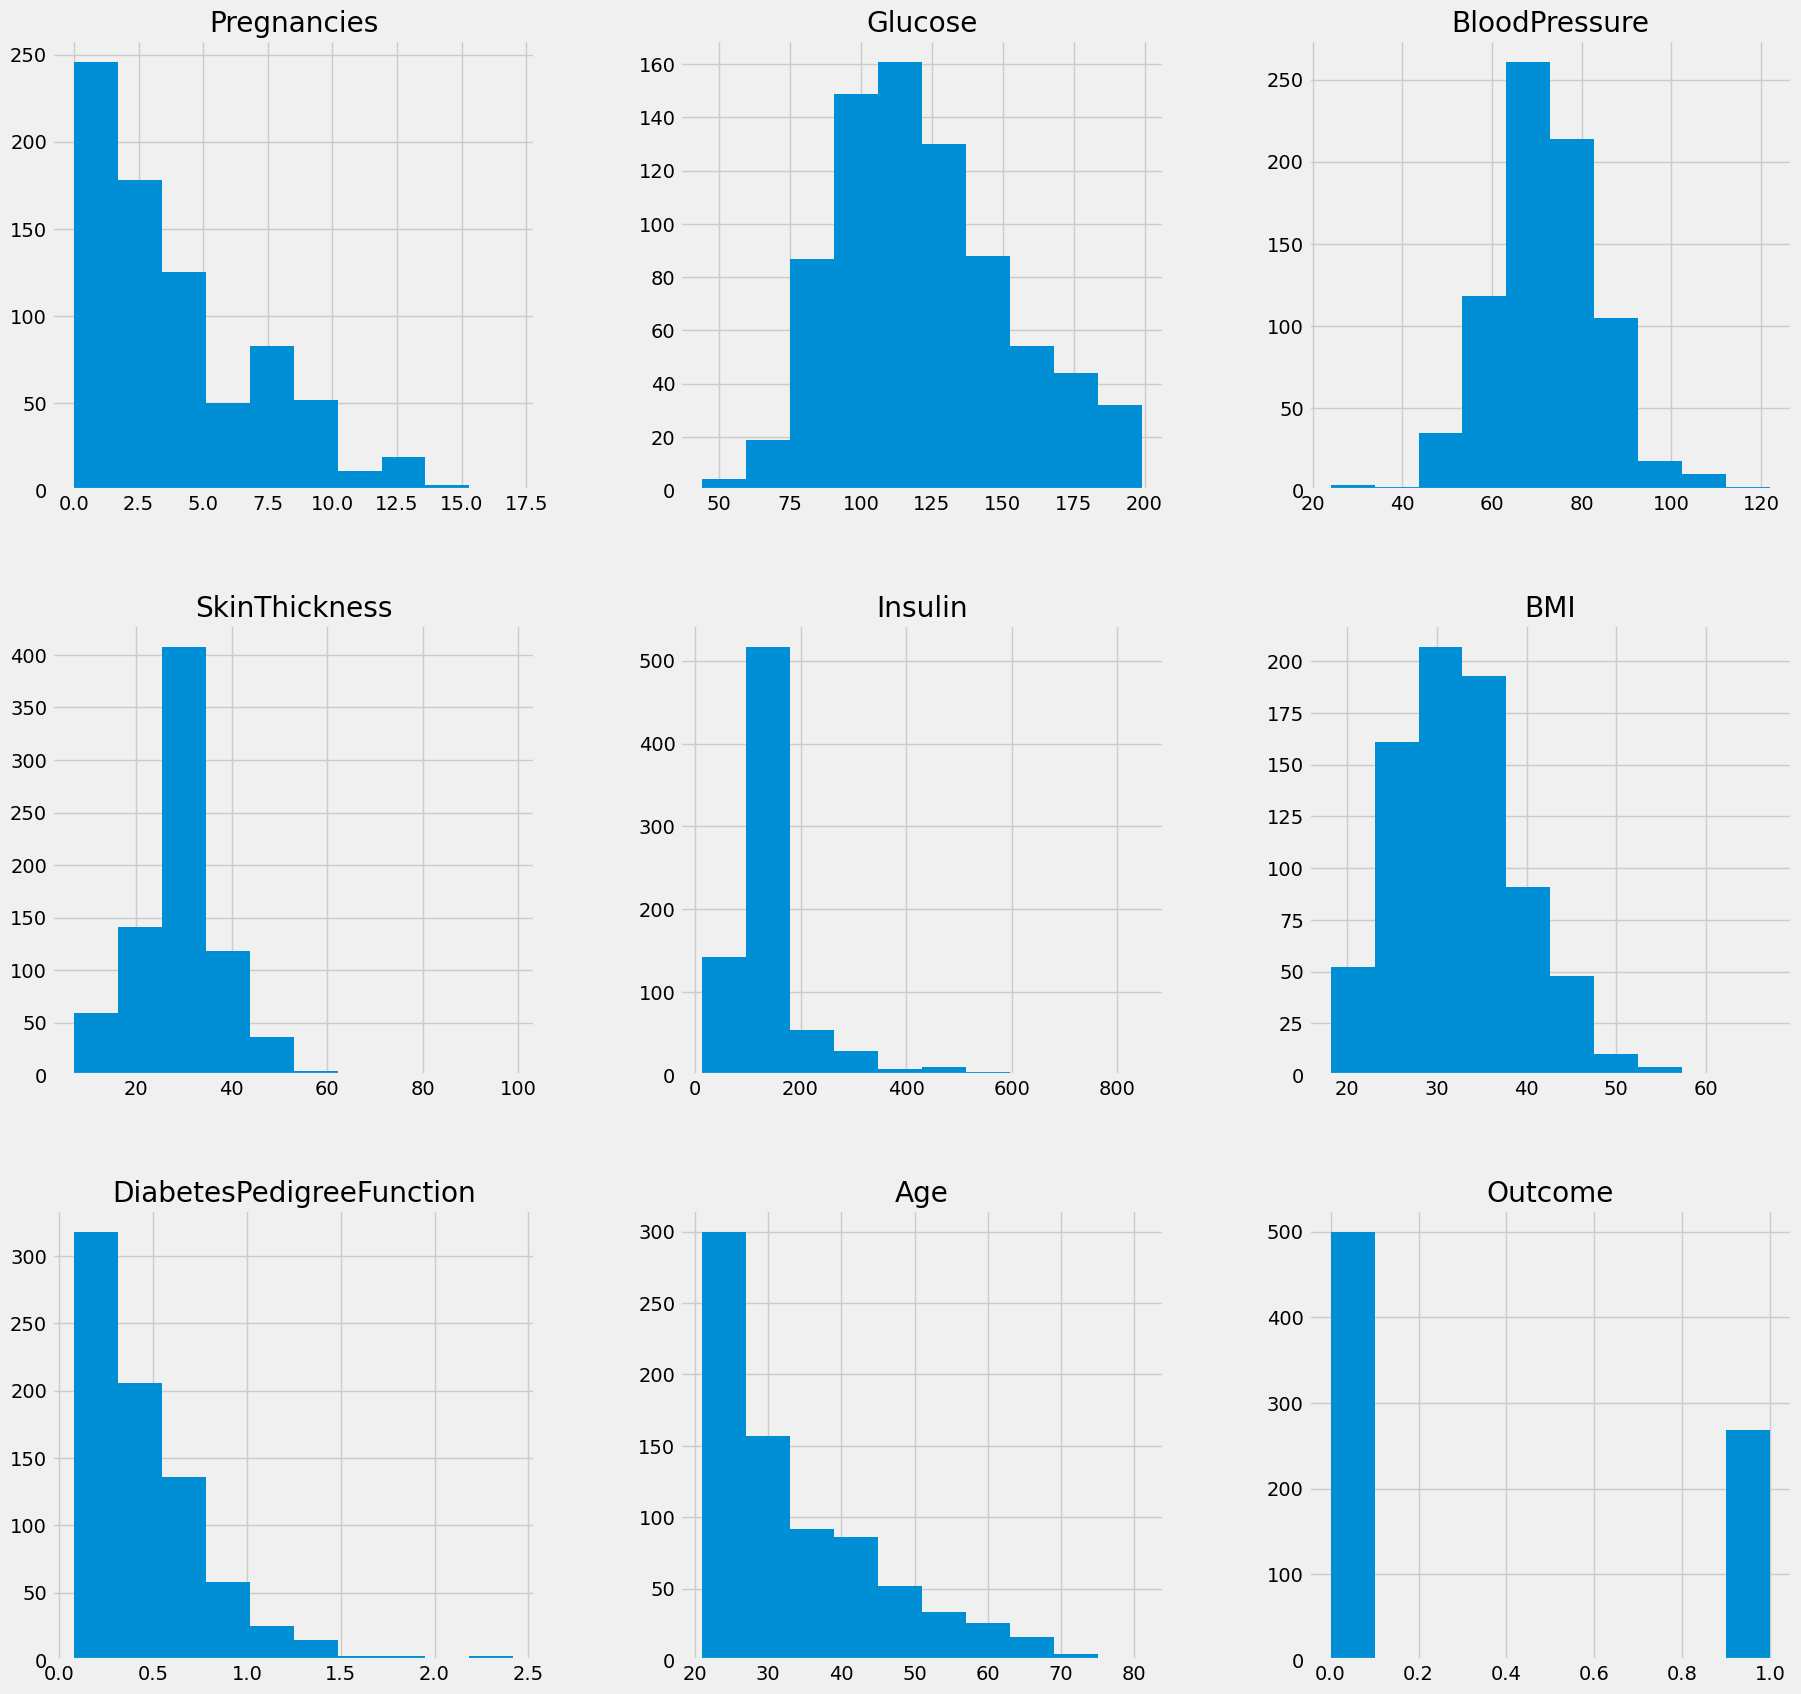

In [10]:
dataset.hist(figsize=(20,20))

Text(0.5, 1.0, 'Number of Diabetic People')

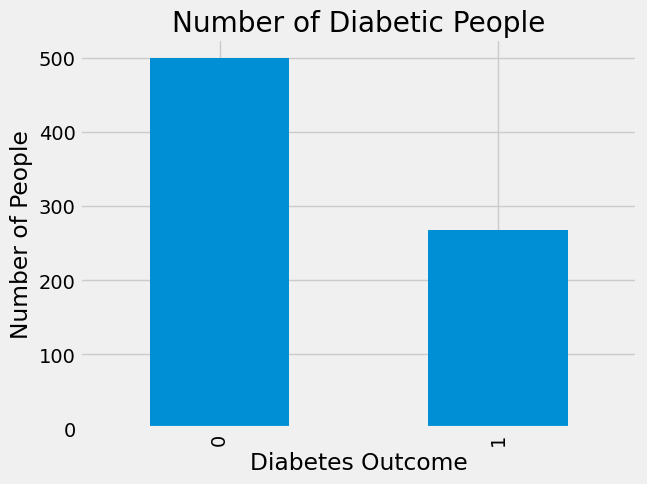

In [11]:
dataset['Outcome'].value_counts().plot(kind='bar')
plt.ylabel('Number of People')
plt.xlabel('Diabetes Outcome')
plt.title('Number of Diabetic People')

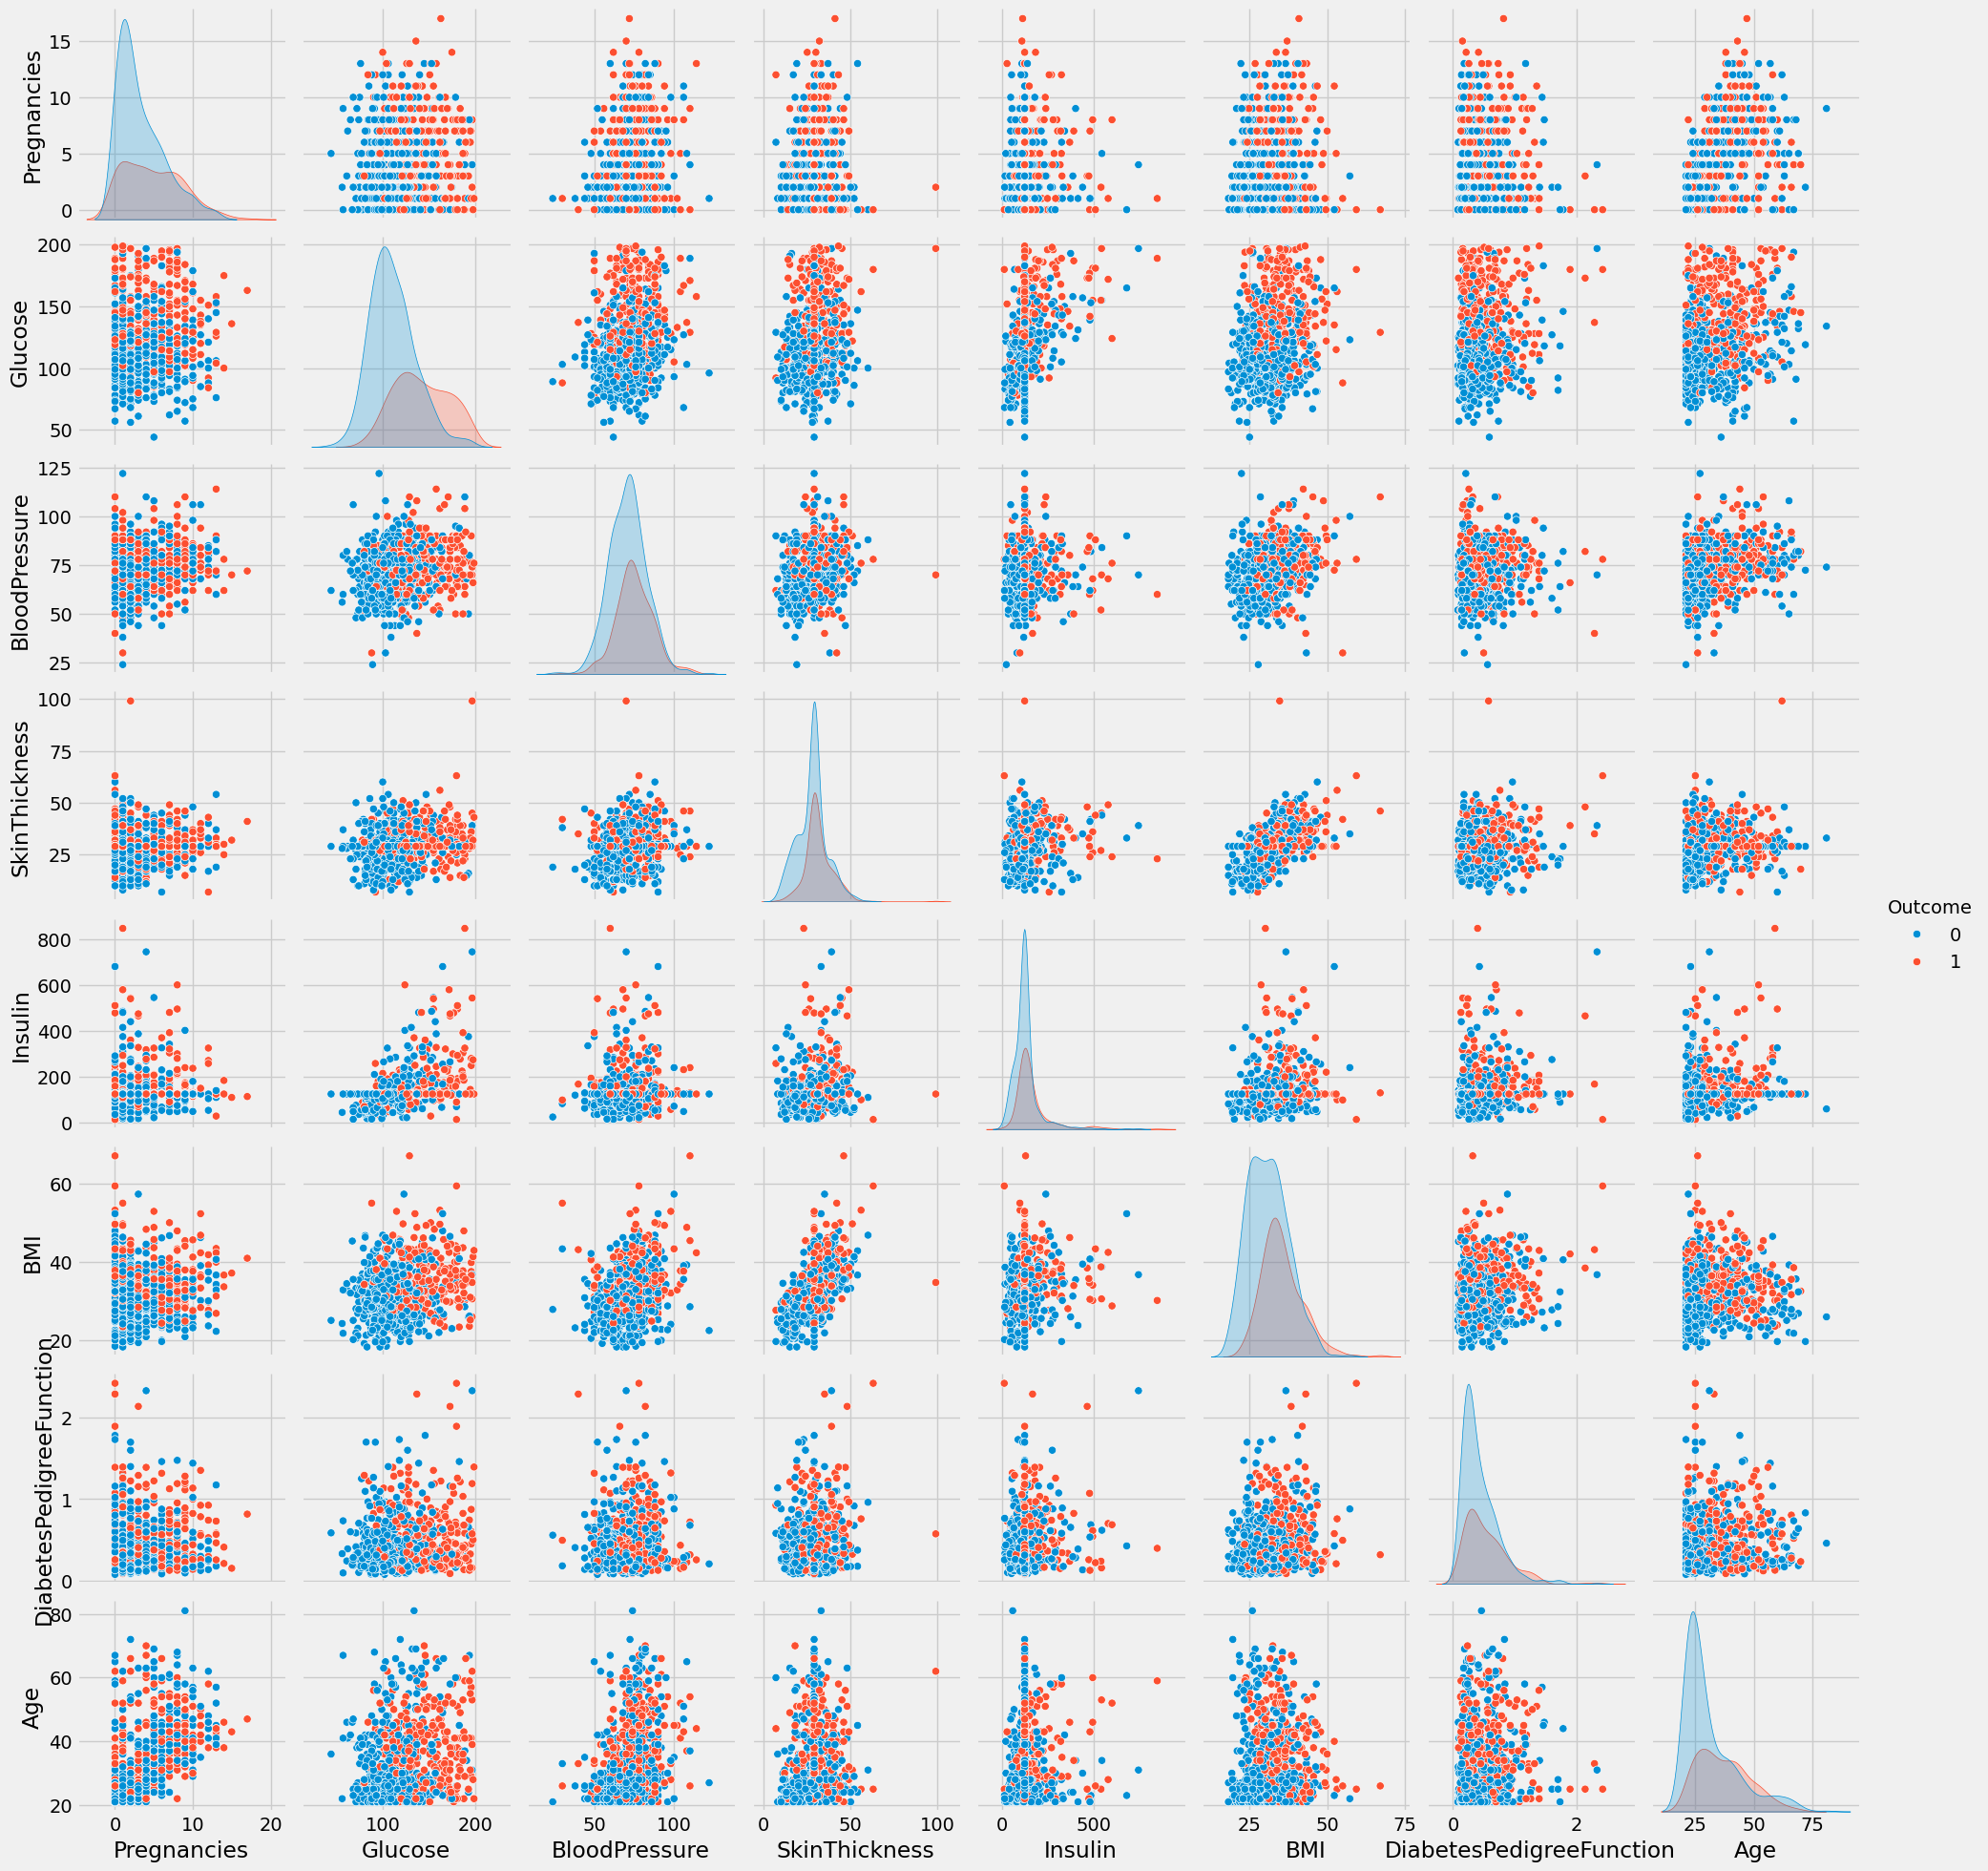

In [12]:
sns.pairplot(dataset, hue = 'Outcome')

<Axes: >

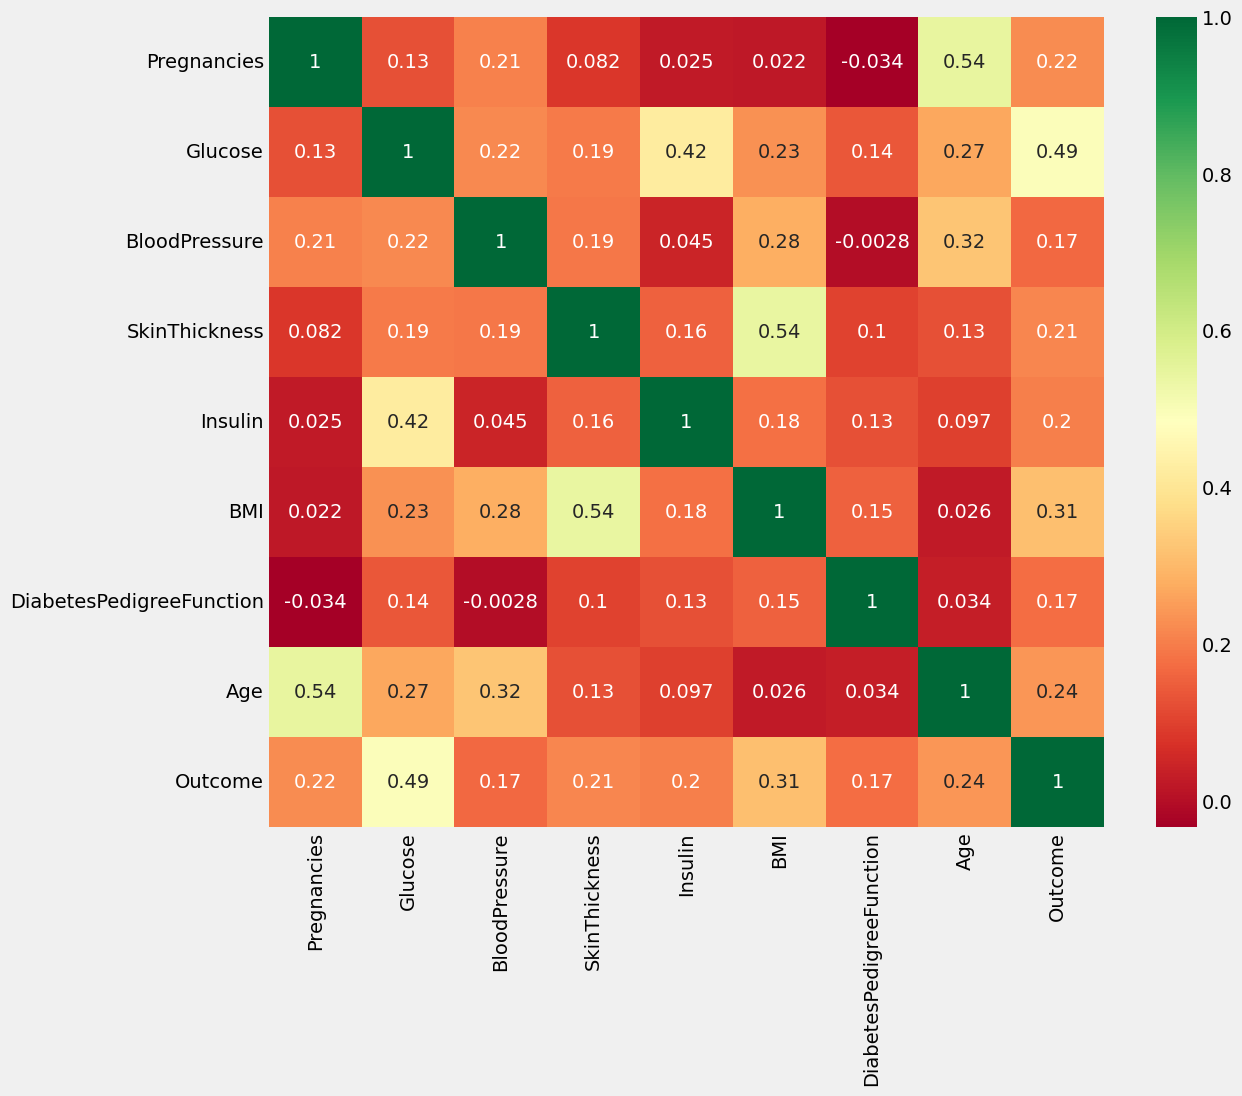

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(),annot=True,cmap ='RdYlGn')

We now standardize the dataset for modelling.

In [14]:
X = dataset.drop(columns='Outcome')
y = dataset['Outcome']

In [15]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [16]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
scaler.fit(X)
X = scaler.transform(X)

In [19]:
X

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [24]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {0:.2f}% and k = {1}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.00% and k = [1]


In [25]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {0:.2f}% and k = {1}'.format(max_test_score*100, list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.56% and k = [11]


Text(0, 0.5, 'Scores')

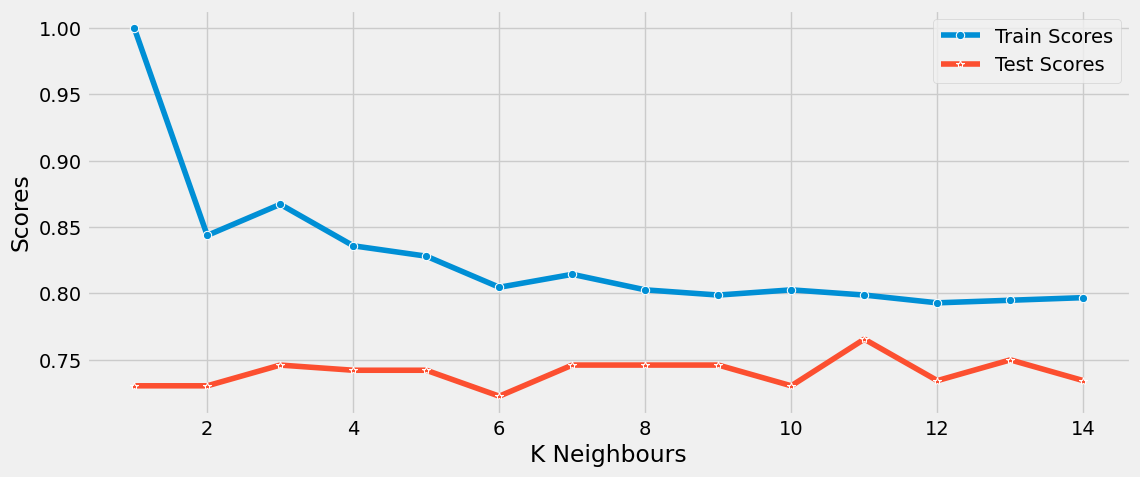

In [26]:
plt.figure(figsize=(12,5))

sns.lineplot(x=range(1,15), y=train_scores, marker='o', label='Train Scores')
sns.lineplot(x=range(1,15), y=test_scores, marker='*', label='Test Scores')
plt.xlabel('K Neighbours')
plt.ylabel('Scores')

The optimal outcome was achieved with the parameter set at k = 11, consequently making 11 the chosen value for the final model.

In [27]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

Text(0.5, 4.183333333333314, 'Predicted Label')

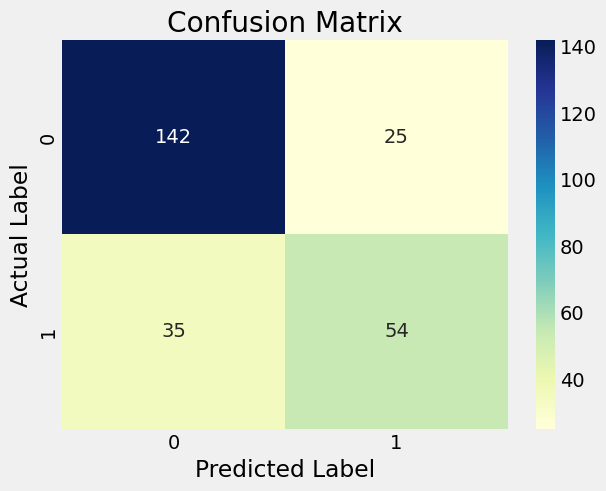

In [29]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy Score  : {0:.2f}%".format(accuracy_score(y_true=y_test, y_pred=y_pred)*100))
print("Precision Score : {0:.2f}%".format(precision_score(y_true=y_test, y_pred=y_pred)*100))
print("Recall Score    : {0:.2f}%".format(recall_score(y_test, y_pred)*100))

Accuracy Score  : 76.56%
Precision Score : 68.35%
Recall Score    : 60.67%


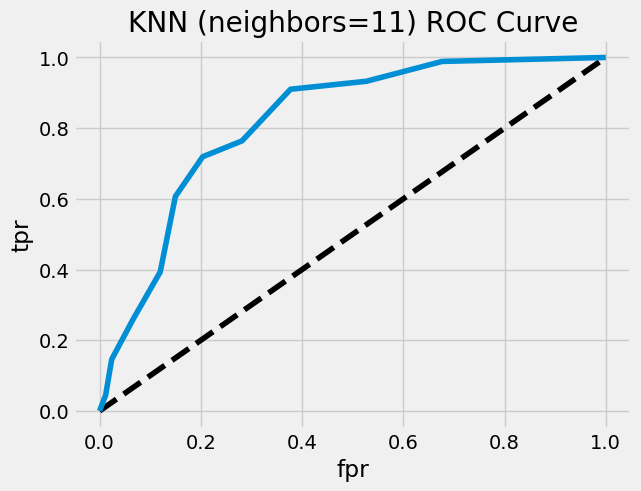

In [36]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN (neighbors=11) ROC Curve')
plt.show()

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)
print("ROC AUC Score   : {0:.2f}%".format(roc_auc_score(y_test,y_pred_proba)*100))

ROC AUC Score   : 81.94%
